# #Predict Hazard Ratings for a Maintenance Project
All the money in the world can not make up for a loss of life. Better safe than sorry is the motto of
all engineering and construction practices which routinely deal with dangerous situations.
However many times , extent of caution is just not enough and leads to very hard learnt lessons
in employee safety .
Instead of relying on something going wrong and then taking preventive measure ; organisations
are coming up with ways of assessing the extent of danger to life for a new project before even
the first hammer strikes .

>importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Read Dataset Files

In [3]:
hz_train = pd.read_csv(r'C:\Users\a.vijaykumar.satpute\Documents\Edvancer\Project4\Hazard_train.csv')
hz_test = pd.read_csv(r'C:\Users\a.vijaykumar.satpute\Documents\Edvancer\Project4\Hazard_test_share.csv')

In [9]:
hz_train.shape, hz_test.shape

((40799, 34), (10200, 33))

In [13]:
hz_train.head()

Id  Hazard  T1_V1  T1_V2  T1_V3 T1_V4 T1_V5 T1_V6 T1_V7 T1_V8  ...  \
0  83642       2     10     23      4     N     K     Y     B     D  ...   
1  92530       6      3     18      2     B     H     N     B     B  ...   
2  86131       4      5     20      4     B     K     N     B     B  ...   
3  88666       1      4      7      5     N     H     N     B     B  ...   
4  11122      21     10     21      6     N     C     Y     B     C  ...   

  T2_V6  T2_V7 T2_V8 T2_V9  T2_V10  T2_V11 T2_V12 T2_V13 T2_V14  T2_V15  
0     2     37     1    11       2       Y      N      E      2       1  
1     2     34     1    12       7       Y      N      C      3       3  
2     1     40     1    17       4       Y      N      D      1       1  
3     2     37     1    11       6       Y      N      D      2       1  
4     2     40     1     6       6       N      N      D      5       5  

[5 rows x 34 columns]

> Checking for any NaN values

In [11]:
hz_train.isna().sum().any()

False

> No null values present in dataset.Check for any duplicated observations

In [27]:
hz_train.duplicated().any()

False

> No duplicate observations present in dataset.Check the unique values

In [12]:
hz_train.nunique()

Id        40799
Hazard       49
T1_V1        19
T1_V2        24
T1_V3         9
T1_V4         8
T1_V5        10
T1_V6         2
T1_V7         4
T1_V8         4
T1_V9         6
T1_V10        5
T1_V11       12
T1_V12        4
T1_V13        4
T1_V14        5
T1_V15        8
T1_V16       18
T1_V17        2
T2_V1       100
T2_V2        39
T2_V3         2
T2_V4        22
T2_V5         6
T2_V6         7
T2_V7         7
T2_V8         3
T2_V9        25
T2_V10        7
T2_V11        2
T2_V12        2
T2_V13        5
T2_V14        7
T2_V15       12
dtype: int64

In [14]:
hz_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      40799 non-null  int64 
 1   Hazard  40799 non-null  int64 
 2   T1_V1   40799 non-null  int64 
 3   T1_V2   40799 non-null  int64 
 4   T1_V3   40799 non-null  int64 
 5   T1_V4   40799 non-null  object
 6   T1_V5   40799 non-null  object
 7   T1_V6   40799 non-null  object
 8   T1_V7   40799 non-null  object
 9   T1_V8   40799 non-null  object
 10  T1_V9   40799 non-null  object
 11  T1_V10  40799 non-null  int64 
 12  T1_V11  40799 non-null  object
 13  T1_V12  40799 non-null  object
 14  T1_V13  40799 non-null  int64 
 15  T1_V14  40799 non-null  int64 
 16  T1_V15  40799 non-null  object
 17  T1_V16  40799 non-null  object
 18  T1_V17  40799 non-null  object
 19  T2_V1   40799 non-null  int64 
 20  T2_V2   40799 non-null  int64 
 21  T2_V3   40799 non-null  object
 22  T2_V4   40799 non-null

> The response variable is Hazard. Lets see its distribution 

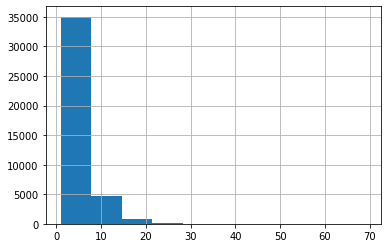

In [20]:
hz_train['Hazard'].hist(bins=10)

> It looks the response variable doesn't follow Gaussian(Normal) Distribution. Also, it is right skewed.
> We may need to apply log/square-root/box-cox transformation to make the distribution normal.
> As it is a rating(count) responses, it is case of Poisson Distribution.
> Lets check the mean and variance of Hazard Response variable

In [25]:
hz_train['Hazard'].mean(), hz_train['Hazard'].var()

(4.009583568224711, 16.062337683829274)

> The assumption for Poisson regression is mean and variance should be equal(Equidispersion). In our case variance is greater than mean(Overdispersion)

> Lets see the skewness in our data for all variables

In [26]:
hz_train.skew()

Id        0.007768
Hazard    2.593124
T1_V1     0.162616
T1_V2    -0.265829
T1_V3     0.575393
T1_V10    0.056147
T1_V13   -0.107858
T1_V14    0.953560
T2_V1    -0.016956
T2_V2     1.193160
T2_V4     0.289433
T2_V6     1.738588
T2_V7    -0.515246
T2_V8     6.671924
T2_V9    -0.166724
T2_V10   -0.283934
T2_V14    1.134055
T2_V15    1.227500
dtype: float64

> We can see Hazard,T2_V6,T2_V8,T2_V14 and T2_V15 has some skewness

> Lets plot box plot for numerical variable

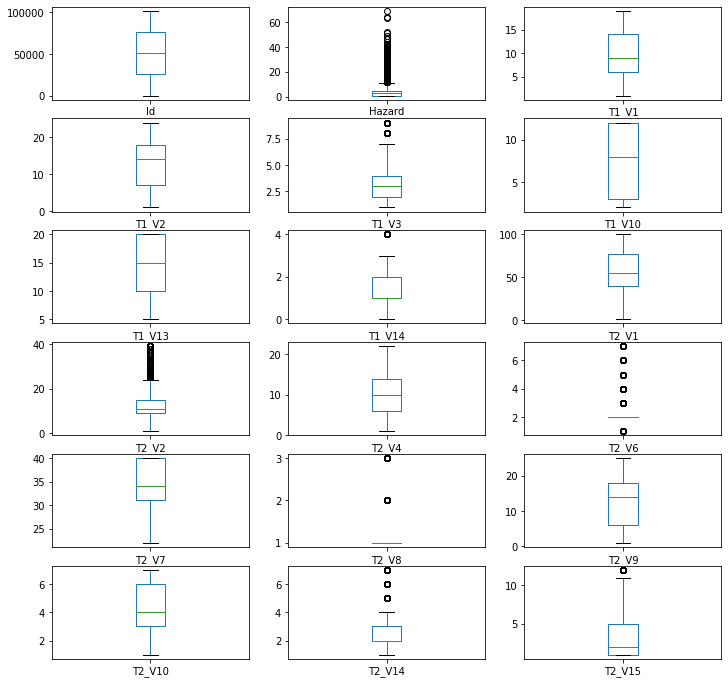

In [32]:
num_col = hz_train.select_dtypes(exclude='object').columns
#fig, ax = plt.subplots(figsize=(12, 7))
hz_train[num_col].plot(kind = 'box', subplots = True, layout = (6,3), figsize=(12,12), sharex = False,sharey = False)
plt.show()

> We can see the outliers in Hazard,T1_V3,T2_V2,T2_V6, T2_V8, T2_V9, T2_V14
> We are not applying any outlier treatment as of now, we will 1st do feature selections

In [80]:
num_col = hz_train.select_dtypes(exclude='object').columns
num_col = num_col.to_list()
num_col = set(num_col) - {'Id', 'Hazard'}
num_col

{'T1_V1',
 'T1_V10',
 'T1_V13',
 'T1_V14',
 'T1_V2',
 'T1_V3',
 'T2_V1',
 'T2_V10',
 'T2_V14',
 'T2_V15',
 'T2_V2',
 'T2_V4',
 'T2_V6',
 'T2_V7',
 'T2_V8',
 'T2_V9'}

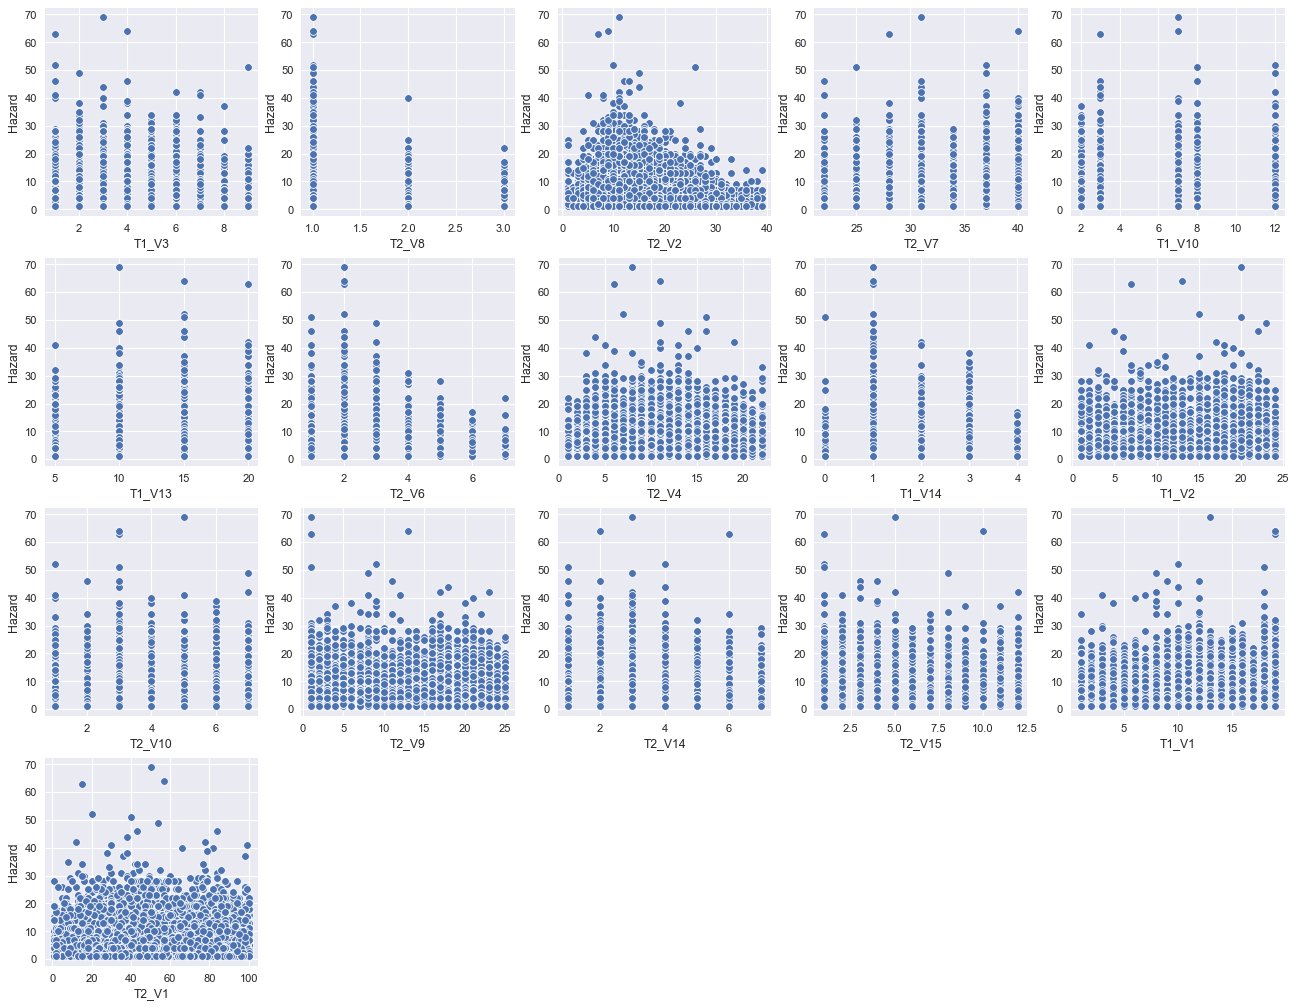

In [81]:
count=1
plt.figure(figsize=(20,20), dpi=80)
for i in num_col:
    plt.subplot(5,5,count)
    sns.scatterplot(hz_train[i],hz_train['Hazard'])
    count+=1

plt.show()

> From scatter plot we can see there is no linear relationship with response variable as most of the IV are count data. Also, most of the numeric IV doesn't follow the normal distribution so, when checking their correlation with response variable we will apply non-parametric test(like Spearman Coefficient Test) which doesn't hold the assumption of the variables are normally distributed.

> The response variable is right skewed, to make normaly distributed we can apply log/square root transformation. Let's check the distribution.

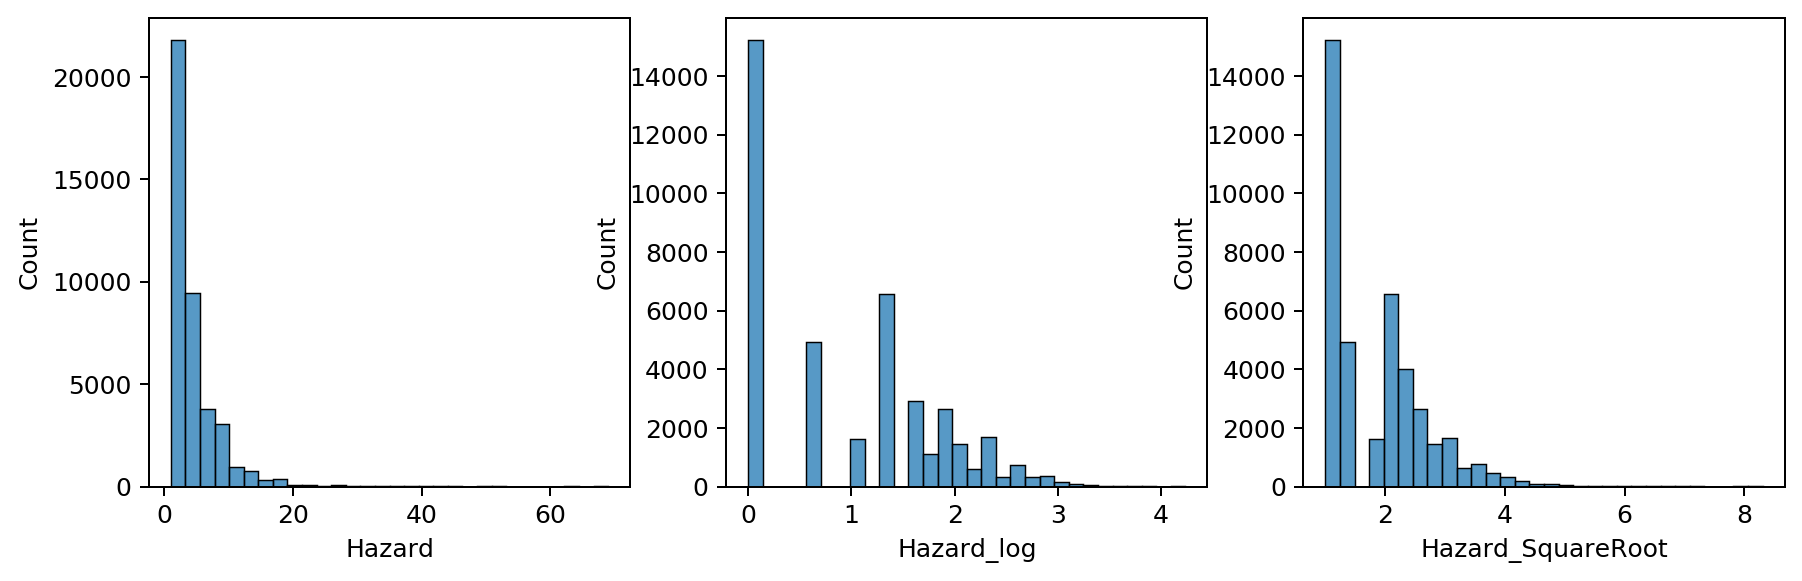

In [55]:
hz_train['Hazard_log'] = np.log(hz_train['Hazard'])
hz_train['Hazard_SquareRoot'] = hz_train['Hazard']**(1/2)
count=1
plt.figure(figsize=(20,20), dpi=180)
response_col = ['Hazard', 'Hazard_log', 'Hazard_SquareRoot']
for i in response_col:
    plt.subplot(5,5,count)
    sns.histplot(hz_train[i], bins = 30)
    count+=1

plt.show()

> We can see the transformation has not changed the distribution very close to normal, but square root transformation has done quite good. We will go ahead with Square root transformation at the time of model building.

In [40]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (40799, 34)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  17
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    34 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
17 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 153


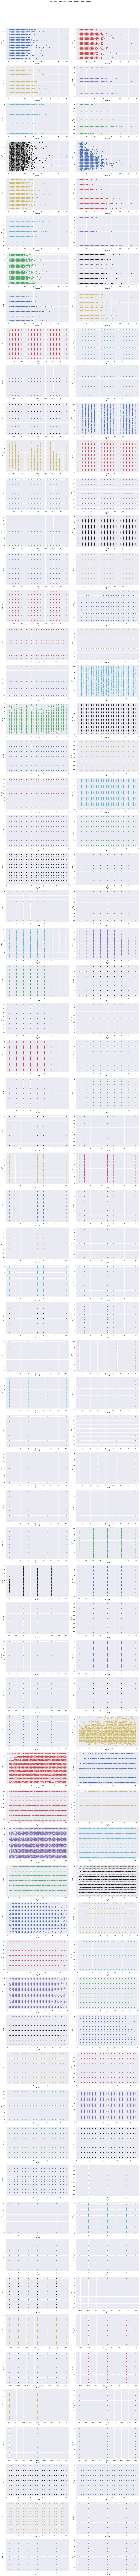

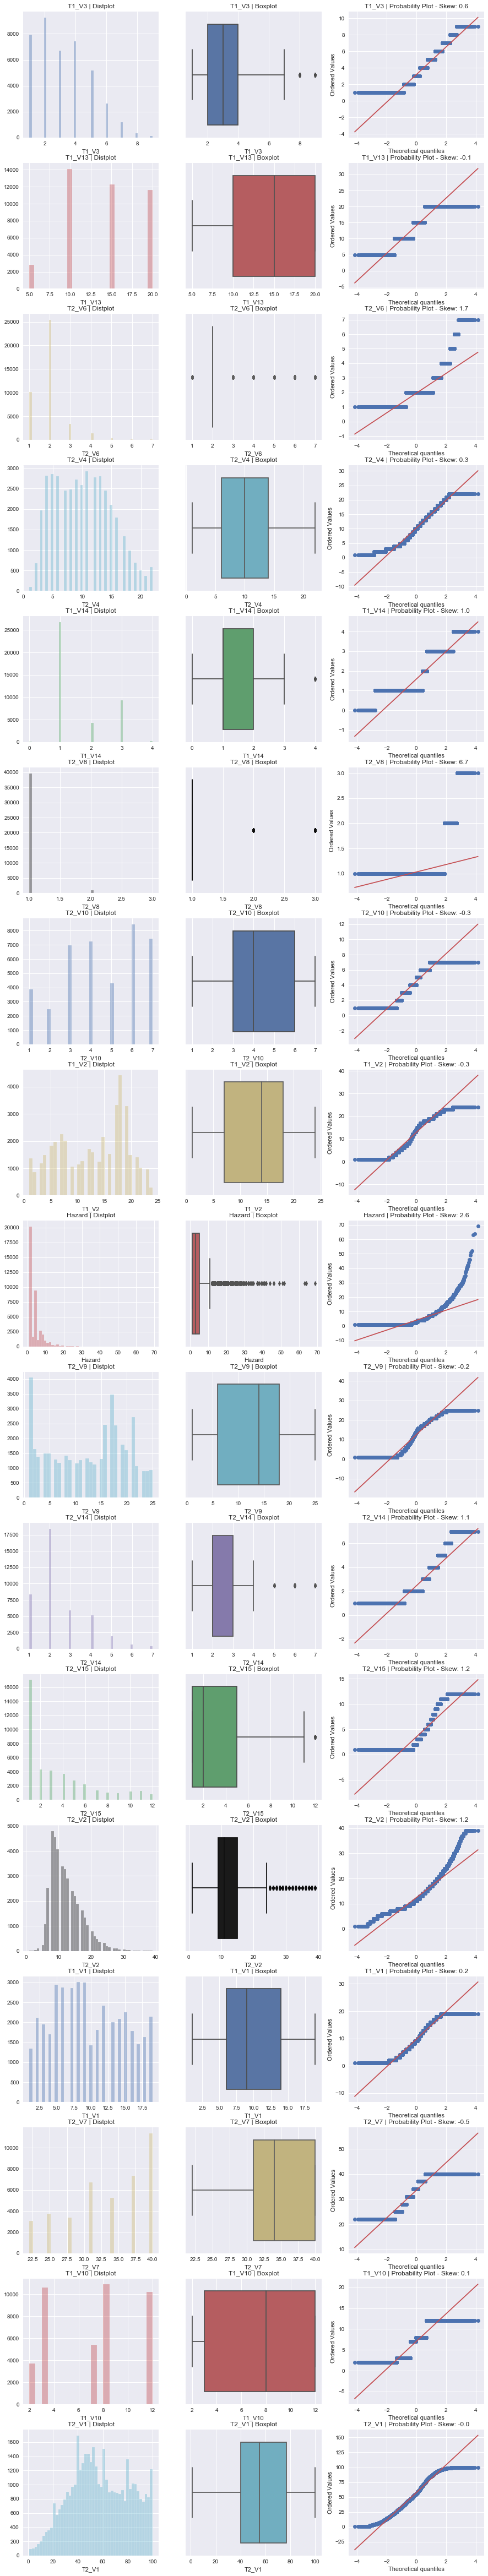

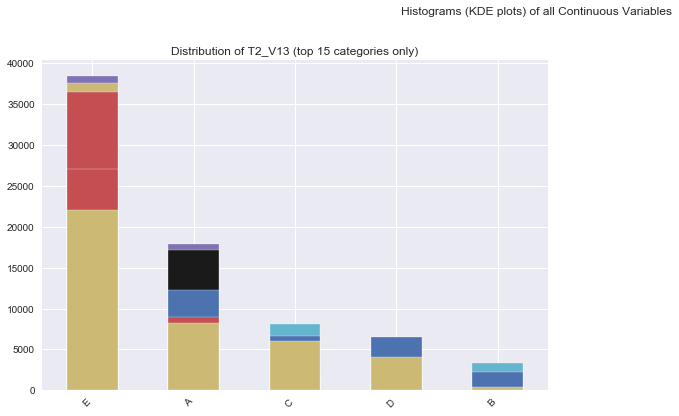

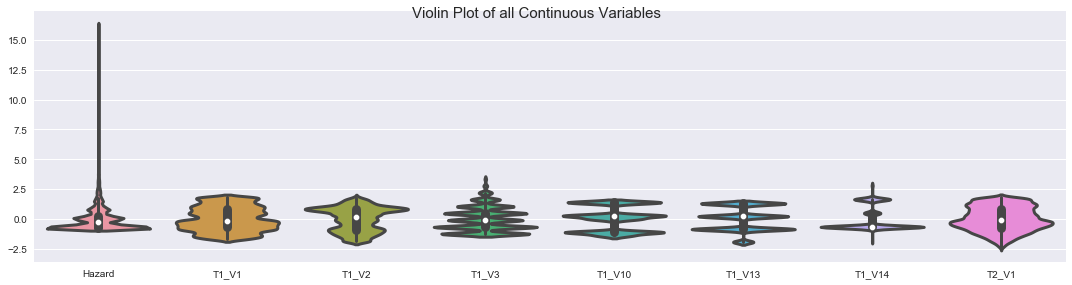

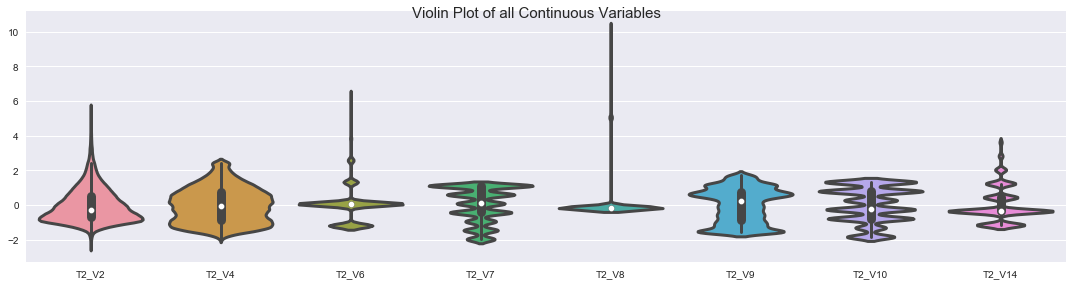

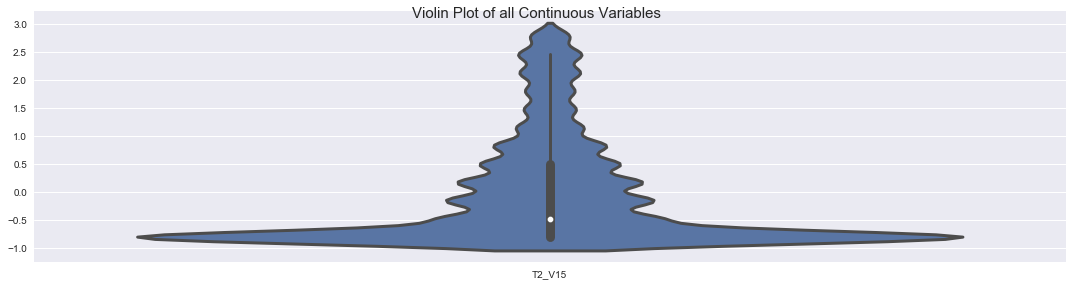

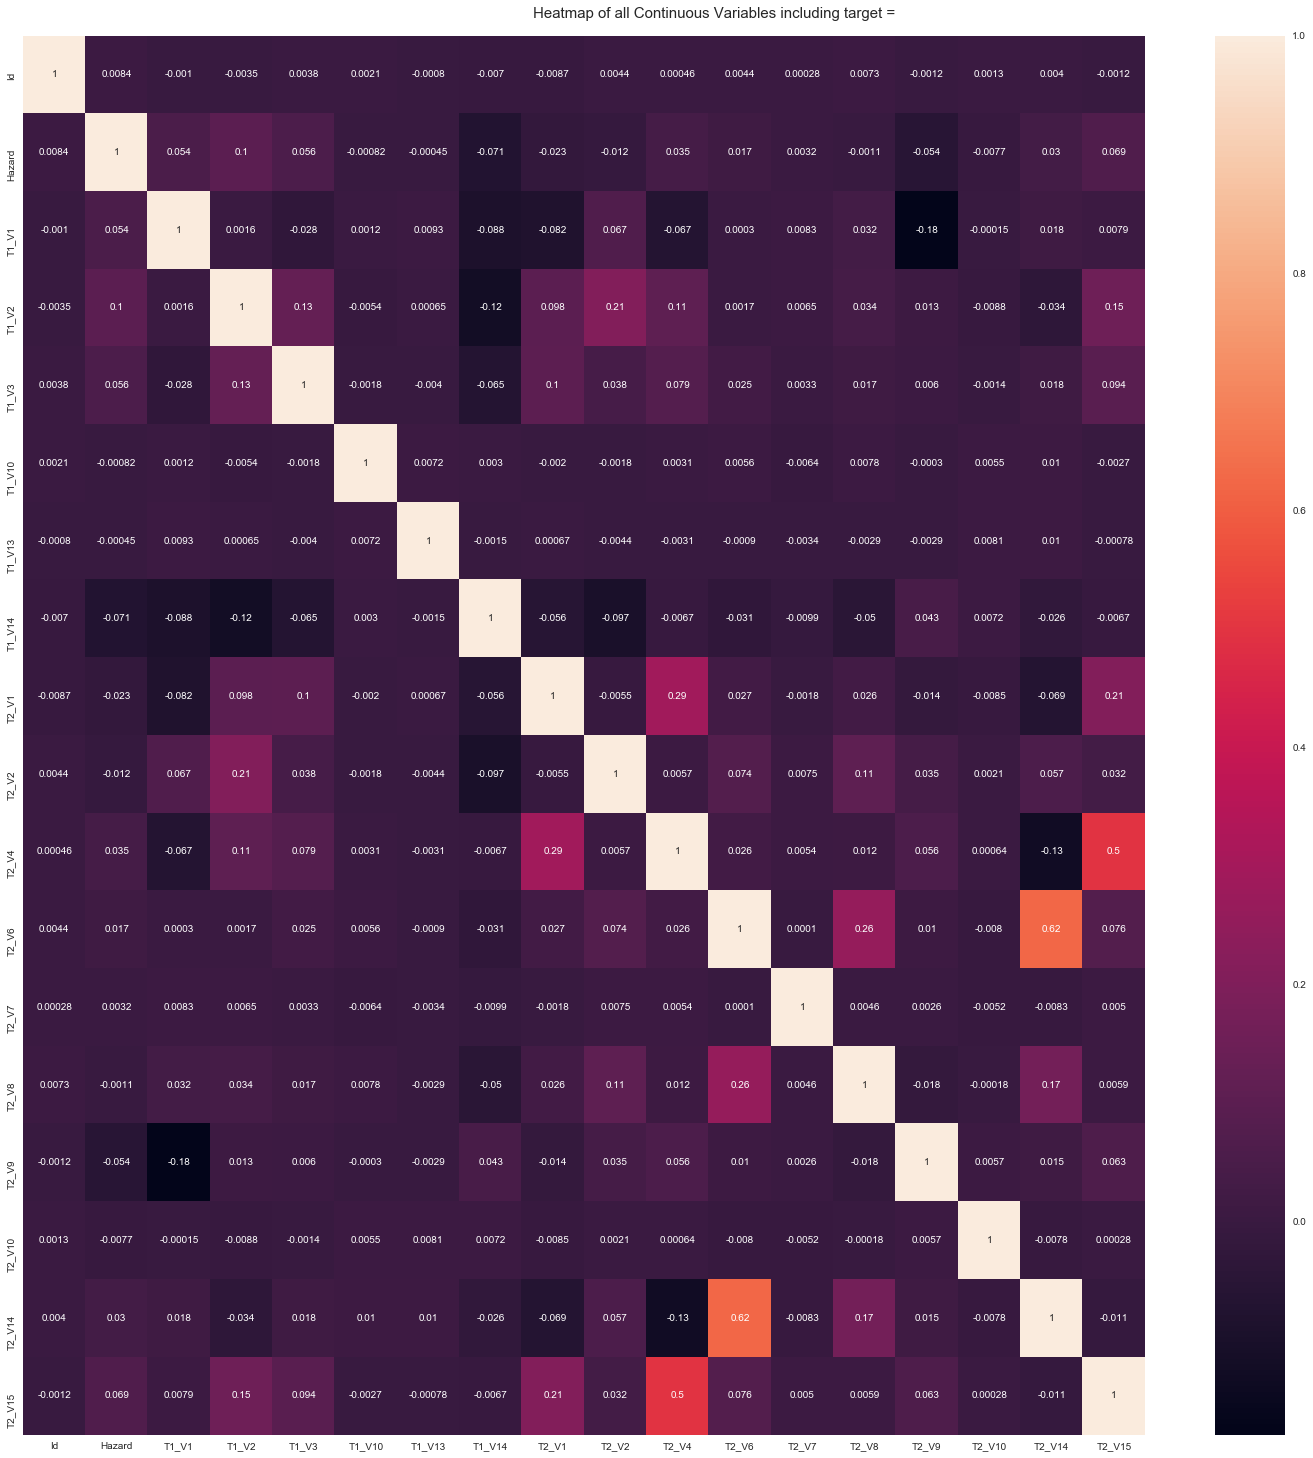

Time to run AutoViz (in seconds) = 187.635

 ###################### VISUALIZATION Completed ########################


In [43]:
df = AV.AutoViz(r'C:\Users\a.vijaykumar.satpute\Documents\Edvancer\Project4\Hazard_train.csv')